Notebook for testing density estimation.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.neighbors import KernelDensity

In [2]:
# Dados
data_path = "../data/processed/"
returns_path = ''.join([data_path, 'ibovespa_treated.xlsx'])
df = pd.read_excel(returns_path, index_col="time")
df.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000011,-0.000372,-0.000035,0.007233,-0.001305,-0.000459,0.002388,0.002212,-0.008001,-0.000824,...,-0.000957,-0.002307,-0.003734,-0.005020,-0.001139,-0.000255,0.002339,0.004176,-0.000224,-0.000238
10:05:00,-0.002271,0.003372,0.001716,0.005538,0.000069,0.006429,0.002343,0.001918,-0.007582,-0.000413,...,-0.001522,0.000739,-0.000613,0.000306,-0.002021,-0.000810,0.001557,-0.001565,-0.000193,0.002906
10:10:00,-0.000582,0.002832,-0.000502,0.000739,0.000261,0.001891,0.000775,-0.001172,0.000216,-0.000432,...,0.000360,-0.000105,-0.000159,-0.000362,0.000092,0.001131,0.001170,0.000202,0.000556,0.000475
10:15:00,-0.001997,0.001091,0.000111,-0.000192,0.000407,-0.001392,-0.000477,-0.001526,0.000198,-0.001821,...,0.001121,-0.000284,0.003272,-0.001107,-0.001012,-0.000174,0.001002,0.001815,-0.000168,0.000973
10:20:00,-0.000037,-0.000505,-0.000327,-0.000580,-0.000436,-0.000405,0.001263,0.000676,-0.002667,0.001033,...,0.000449,0.000335,0.000853,0.000981,-0.000057,-0.000096,0.000832,0.001951,0.001060,-0.001004


In [10]:
t = 0

x = df.iloc[:,t].values

In [44]:
kde_scipy = gaussian_kde(x, bw_method="silverman")

kde_statsmodels = KDEUnivariate(x)
kde_statsmodels.fit(bw="silverman", kernel="gau")

kde_sklearn = KernelDensity(kernel="gaussian", bandwidth=0.001).fit(x[:, None])

In [45]:
M = 256
x_support = np.linspace(x.min(), x.max(), 100)

pdf_scipy = kde_scipy(x_support)
pdf_statsmodels = kde_statsmodels.evaluate(x_support)
log_pdf_sklearn = kde_sklearn.score_samples(x_support[:, None])
pdf_sklearn = np.exp(log_pdf_sklearn)

[]

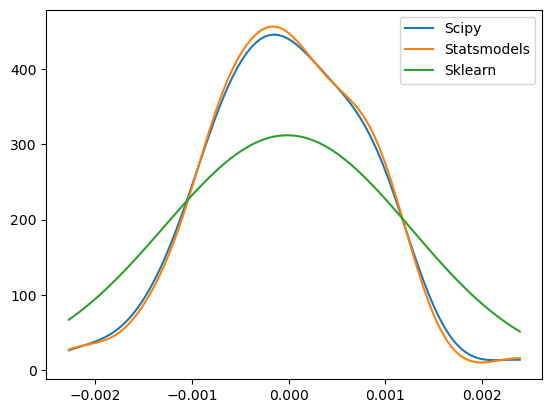

In [46]:
plt.figure()


plt.plot(x_support, pdf_scipy, label="Scipy")
plt.plot(x_support, pdf_statsmodels, label="Statsmodels")
plt.plot(x_support, pdf_sklearn, label="Sklearn")

plt.legend()

plt.plot()